#   
<span style="font-family:Arial; font-weight:Bold; font-size:2.3em; color:#00b3e5;"> Text Summarizer

#####      
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> loading libraries  

In [1]:
import numpy  as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import re #, string, unicodedata
#from   bs4 import BeautifulSoup

#from   textblob  import TextBlob, Word
from   wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#import spacy

#from sklearn.svm           import SVC
#from sklearn.naive_bayes   import MultinomialNB
#from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model  import LogisticRegression, SGDClassifier
from sklearn               import model_selection, preprocessing, naive_bayes, ensemble 
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.metrics       import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
import nltk   # pip install --upgrade nltk

nltk.download('punkt')
from nltk.probability      import FreqDist
#from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize         import word_tokenize, sent_tokenize

nltk.download('stopwords') 
from nltk.corpus           import stopwords

nltk.download('wordnet')
from nltk.stem             import WordNetLemmatizer 

#from nltk.stem            import LancasterStemmer 
#from nltk.stem.porter     import PorterStemmer

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


#####      
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> loading dataset

In [3]:
with open('Story_1.txt', 'r') as file:
    text = file.read().strip().replace('\n',' ').replace(';',' .').replace('-',' ').replace('_',' ').replace('.', ' .')
    
Clean_Text = ''
for word in word_tokenize(text):
    Clean_Text = Clean_Text + ' ' + word
text = Clean_Text

text = text.replace('Mr .','Mr').replace('Mrs .','Mrs').replace('Dr .','Dr')
text = text.replace('mr .','mr').replace('mrs .','mrs').replace('dr .','dr')

text

" THE RED HEADED LEAGUE . Arthur Conan Doyle . I had called upon my friend , Mr Sherlock Holmes , one day in the autumn of last year and found him in deep conversation with a very stout , florid faced , elderly gentleman with fiery red hair . With an apology for my intrusion , I was about to withdraw when Holmes pulled me abruptly into the room and closed the door behind me . `` You could not possibly have come at a better time , my dear Watson , '' he said cordially . `` I was afraid that you were engaged . '' `` So I am . Very much so . '' `` Then I can wait in the next room . '' `` Not at all . This gentleman , Mr Wilson , has been my partner and helper in many of my most successful cases , and I have no doubt that he will be of the utmost use to me in yours also . '' The stout gentleman half rose from his chair and gave a bob of greeting , with a quick little questioning glance from his small fat encircled eyes . `` Try the settee , '' said Holmes , relapsing into his armchair and 

In [4]:
data = pd.DataFrame( )
data['text'] = [text]
data.head()

,text
0,THE RED HEADED LEAGUE . Arthur Conan Doyle . ...


#####      
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> NLP Preprocessing

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Remove New Lines

In [5]:
# removing new lines
def remove_new_lines(text): return re.sub('[\n]',' ', text)
data['text'] = data['text'].apply(remove_new_lines)

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Remove Punctuations

In [6]:
# removing punctuations
def remove_punctuations(text): return re.sub('[^a-zA-Z.]',' ', text)
data['text'] = data['text'].apply(remove_punctuations)

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Converting to LowerCase

In [7]:
# converting text to lower_case
def into_lower(text): return text.lower()
data['text'] = data['text'].apply(into_lower)

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Correcting

In [8]:
data['text'][0] = data['text'][0].replace('mr .','mr').replace('mrs .','mrs').replace('dr .','dr')

#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Set & Remove Stop_Words

<span style="font-family:Arial; font-weight:Bold; font-size:1.2em; color:#00b3e5;"> Setting Stop_Words

In [9]:
# Setting English StopWords
stop_words = set( stopwords.words('english') )
new_words  = [ 'should', 'would', 'could', 'might' 
             ] 
stop_words = stop_words.union(new_words)

#####   

#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> Iterate

<span style="font-family:Arial; font-weight:Bold; font-size:1.2em; color:#00b3e5;"> Removing Stop_Words

In [33]:
def remove_stop_words(text):
    Clean = []
    for word in text.split():
        if word.strip() not in stop_words:
            Clean.append(word.strip()) 
    return ' '.join( Clean )

data['text'] = data['text'].apply( remove_stop_words )
data['text'][0][500:1500]

'ustom judicial mood . dear watson share love bizarre outside convention humdrum routine everyday life . show relish enthusiasm prompt chronicle excuse somewhat embellish adventure . case interest observe . remember remark day simple problem present miss mary sutherland strange effect extraordinary combination life always far dare effort imagination . proposition liberty doubt . doctor none less round view otherwise shall keep pile fact fact reason break acknowledge right . jabez wilson call morning begin narrative promise singular listen time . hear remark strange unique thing often connect large small crime occasionally room doubt whether positive crime commit . far hear impossible whether present case instance crime course event certainly among singular listen . wilson kindness recommence narrative . merely friend dr watson hear part also peculiar nature story anxious every possible detail lip . rule hear slight indication course event able guide thousand similar case occur memory .

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Lemmatizing

In [34]:
# Lemmatizing 
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    Clean = []
    for word in text.split():
        w = word
        w = lemmatizer.lemmatize(w, pos="n")   # nouns
        w = lemmatizer.lemmatize(w, pos="v")   # verbs
        w = lemmatizer.lemmatize(w, pos="a")   # adj
        w = lemmatizer.lemmatize(w, pos="r")   # adv
        w = lemmatizer.lemmatize(w, pos="s")   # satellite adj
        Clean.append( w )
    return ' '.join( Clean )

data['text'] = data['text'].apply(lemmatize_text)
data['text'][0][:300]

'red head league . . call friend sherlock holmes day autumn year deep conversation stout florid face elderly gentleman fiery red hair . apology intrusion withdraw holmes pull abruptly room close behind . possibly time dear watson cordially . afraid engage . . much . wait room . . gentleman wilson par'

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Stemming
 - Faster but less accurate than Lemmatizer

In [35]:
# Stemming
''' 
Stemmer = PorterStemmer()

def stem_text(text):
    Clean = []
    for word in text.split():
        Clean.append( Stemmer.stem(word) )
    return ' '.join( Clean )

data['text'] = data['text'].apply(stem_text)
data.head()
''' 
pass

<span style="font-family:Arial; font-weight:Bold; font-size:1.2em; color:#00b3e5;"> Removing Stop_Words

In [36]:
data['text'] = data['text'].apply( remove_stop_words )
data['text'][0][:300]

'red head league . . call friend sherlock holmes day autumn year deep conversation stout florid face elderly gentleman fiery red hair . apology intrusion withdraw holmes pull abruptly room close behind . possibly time dear watson cordially . afraid engage . . much . wait room . . gentleman wilson par'

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Bag of Words (List)

In [37]:
def bag_of_words_maker(df,ft):
    texts = df[ft]
    bag   = []
    for text in texts:
        for word in text.split():
            bag.append( word )
    return bag

bag_of_words = bag_of_words_maker( data, 'text' )

BOW = []
for w in bag_of_words:
    if w != '.':
        BOW.append(w)
bag_of_words = BOW

bag_of_words[:5]

['red', 'head', 'league', 'call', 'friend']

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Bag of Words (DataFrame)

In [38]:
bag_of_words = pd.DataFrame( bag_of_words, columns=['word'] )
bag_of_words.head(5)

,word
0,red
1,head
2,league
3,call
4,friend


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Words Count (DataFrame)

In [39]:
words_count         = pd.DataFrame( bag_of_words[ 'word' ].value_counts() )
words_count['word'] = words_count.index
words_count.index   = range( words_count.shape[0] )
words_count.head(15)

,count,word
0,53,holmes
1,34,head
2,30,red
3,27,man
4,22,wilson
5,22,hear
6,20,time
7,19,business
8,19,day
9,17,two


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Visualizing Top Words

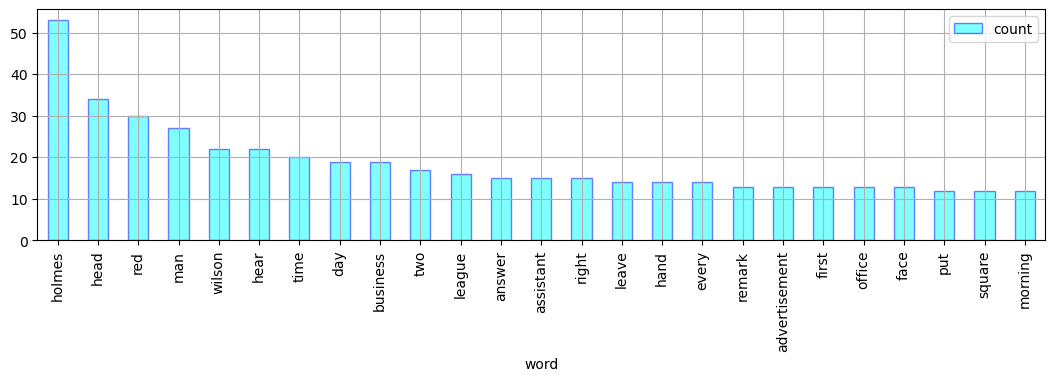

In [40]:
df = words_count
cat, sclr = 'word', 'count'

df.groupby(by=[cat])[sclr].median().reset_index().sort_values([sclr],ascending=False).head(25).\
plot( x=cat, y=sclr, kind='bar',  figsize=(13,3), color='cyan', edgecolor='blue', alpha=0.5, grid='on' ); plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> new stop words

In [41]:
new_stop_words  = [ 'say', 'upon', 'well', 'enough', 'yes', 'sir', 'go', 'mr'
                  , 'back', 'see', 'think', 'come', 'like', 'around', 'tell', 'take'
                  , 'though', 'make', 'look', 'felt', 'saw', 'get', 'near', 'yet', 'n', 'u', 'even', 'may', 'know', 'find'
                  ] 
stop_words = stop_words.union( new_stop_words )

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> Re-Iterate

#####   

#####   

#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> Keeping Top Words

In [42]:
'''
n = 3000
Top_Words = words_count.loc[:n,'word'].tolist()
Top_Words[:5]
'''
pass

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Text Reduction

In [43]:
'''
def text_reduct( text ):
    Clean = []
    for word in text.split():
        if word in Top_Words:
            Clean.append(word)
    return ' '.join(Clean)

data['text'] = data['text'].apply(text_reduct)
#data['text'][0]
'''
pass

#####      
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Cool Image of Top Phrases

In [44]:
df = pd.DataFrame( )
df['text'] = [text]
df['text'] = df['text'].apply(remove_new_lines)
#df['text'] = df['text'].apply(remove_punctuations)
df['text'] = df['text'].apply(into_lower)

vec=CountVectorizer( min_df=0, max_df=500, binary=False, ngram_range=(2,4) ).fit( df['text'] )
bag=vec.transform(data['text'])

s = bag.sum(axis=0)
f = [ (word,s[0,idx]) for word, idx in vec.vocabulary_.items() ]
f = sorted( f, key=lambda x: x[1], reverse=True )
f[:50]

[('red head', 22),
 ('sherlock holmes', 10),
 ('jabez wilson', 9),
 ('coburg square', 8),
 ('duncan ross', 7),
 ('saxe coburg', 6),
 ('john clay', 6),
 ('saxe coburg square', 6),
 ('vincent spaulding', 5),
 ('red hair', 3),
 ('pope court', 3),
 ('wilson assistant', 3),
 ('baker street', 3),
 ('bank director', 3),
 ('fiery red', 2),
 ('dear watson', 2),
 ('manual labour', 2),
 ('ezekiah hopkins', 2),
 ('fleet street', 2),
 ('pawnbroker business', 2),
 ('encyclopaedia britannica', 2),
 ('week work', 2),
 ('every morning', 2),
 ('whole business', 2),
 ('william morris', 2),
 ('suburban bank', 2),
 ('doubt doctor', 2),
 ('police agent', 2),
 ('scotland yard', 2),
 ('remarkable man', 2),
 ('light lantern', 2),
 ('french gold', 2),
 ('lurid spark', 2),
 ('man business', 2),
 ('deep conversation', 1),
 ('stout florid', 1),
 ('elderly gentleman', 1),
 ('utmost use', 1),
 ('stout gentleman', 1),
 ('small fat', 1),
 ('humdrum routine', 1),
 ('everyday life', 1),
 ('simple problem', 1),
 ('miss m

In [45]:
Top_N = 25
Top_Phrases = pd.DataFrame(f[:Top_N], columns=['Word','Freq'])
Freq_Max = Top_Phrases.loc[0,'Freq']
Top_Phrases.head()

,Word,Freq
0,red head,22
1,sherlock holmes,10
2,jabez wilson,9
3,coburg square,8
4,duncan ross,7


In [46]:
Top_Corpus = []
for w in Top_Phrases['Word']:
    try:
        w1,w2,w3,w4 = w.split()
        Top_Corpus.append(str(w1+'_'+w2+'_'+w3+'_'+w4))
    except:
        try:
            w1,w2,w3 = w.split()
            Top_Corpus.append(str(w1+'_'+w2+'_'+w3))
        except:
            try:
                w1,w2 = w.split()
                Top_Corpus.append(str(w1+'_'+w2))
            except:
                Top_Corpus.append(str(w))
Top_Corpus = ' '.join(Top_Corpus)
Top_Corpus

'red_head sherlock_holmes jabez_wilson coburg_square duncan_ross saxe_coburg john_clay saxe_coburg_square vincent_spaulding red_hair pope_court wilson_assistant baker_street bank_director fiery_red dear_watson manual_labour ezekiah_hopkins fleet_street pawnbroker_business encyclopaedia_britannica week_work every_morning whole_business william_morris'

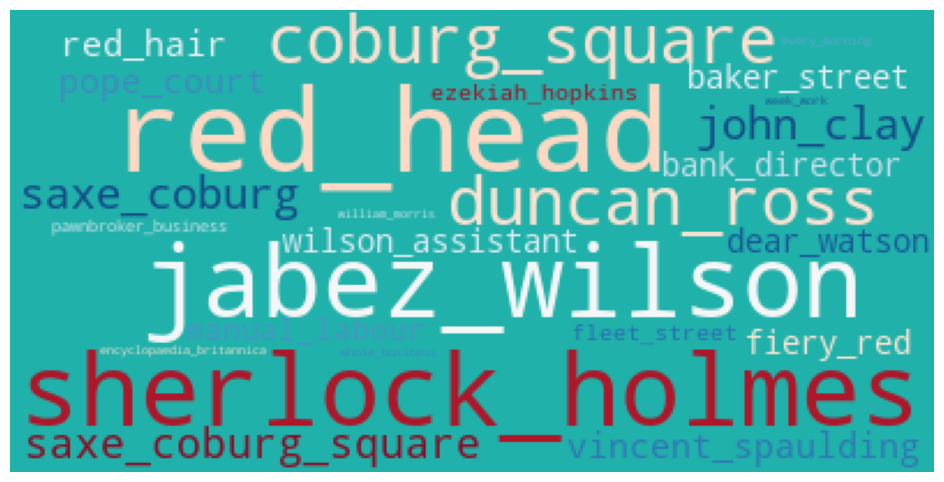

In [47]:
wordcloud = WordCloud( 
    
    background_color='LightSeaGreen', colormap='RdBu',
    #background_color='black', colormap='Greens',
    #background_color='black', colormap='Blues',
    
    stopwords        = stop_words,
    max_words        = Top_N,
    max_font_size    = 50,
    random_state     = 7 
    ).generate( str(Top_Corpus) ) 

fig = plt.figure(figsize=(13,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> new stop words

In [48]:
new_stop_words  = [ 'conan', 'doyle', 'somewhere', 'arthur', 'name', 'another', 'away'
                  , 'good', 'fortune', 'purely', 'nominal', 'froc', 'coat'
                  ] 
stop_words = stop_words.union( new_stop_words )

#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> TOP WORDS

In [49]:
# input
MIN_Repeat = 15   # minimum number of appearances in text

# auto
TOP_WORDS = []
for w in f:
    if w[1] >= MIN_Repeat:
        try:
            w1,w2,w3, w4 = w[0].split( )
            TOP_WORDS.append( w1 )
            TOP_WORDS.append( w2 )
            TOP_WORDS.append( w3 )
            TOP_WORDS.append( w4 )
        except:
            try:
                w1,w2,w3 = w[0].split( )
                TOP_WORDS.append( w1 )
                TOP_WORDS.append( w2 )
                TOP_WORDS.append( w3 )
            except:
                w1,w2 = w[0].split( )
                TOP_WORDS.append( w1 )
                TOP_WORDS.append( w2 )            
TOP_WORDS = list( set( TOP_WORDS ))
TOP_WORDS.sort()
print( len(TOP_WORDS), 'TOP_WORDS:  ', TOP_WORDS )

2 TOP_WORDS:   ['head', 'red']


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> new stop words

In [50]:
new_stop_words  = [ 'toward', 'quickly', 'never', 'open', 'know', 'hall', 'great', 'front', 'door', 'bus'
                  , 'last', 'still', 'suddenly', 'yeah', 'yes'
                  , 'another', 'ask', 'away', 'catch', 'chapter', 'distance', 'eat', 'good', 'great', 'inside'
                  , 'little', 'long', 'many', 'must', 'never', 'oh', 'old', 'one', 'run', 'voice'
                  , 'almost', 'become', 'confess', 'due', 'even', 'ever', 'find', 'half', 'indeed', 'know'
                  , 'little', 'many', 'may', 'must', 'next', 'nothing', 'perhaps', 'reach', 'yet', 'chapter' 
                  ] 
stop_words = stop_words.union( new_stop_words )

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> Re-Iterate

#####   

#####   

In [51]:
MIN_REP = 10**10

for i in words_count.index:
    if words_count.loc[i,'count']>= MIN_REP:
        w = words_count.loc[i,'word'] 
        TOP_WORDS.append( w )           
TOP_WORDS = list( set( TOP_WORDS ))
TOP_WORDS.sort()
print( len(TOP_WORDS), 'TOP_WORDS:  ', TOP_WORDS )

2 TOP_WORDS:   ['head', 'red']


#####   

#####      
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Summary

In [52]:
# input
num_sentences = 10

# Calculate word frequencies
fdist = FreqDist( TOP_WORDS )

for i in words_count.index:
    w = words_count.loc[ i, 'word' ]
    if w in TOP_WORDS:
        freq = words_count.loc[ i, 'count' ]
        freq = min( Freq_Max, freq )
        fdist[ w ] = freq

# Assign scores to sentences based on word frequencies
sentences       = sent_tokenize( text )
sentence_scores = [ sum(fdist[word] for word in word_tokenize(
    lemmatizer.lemmatize( 
        lemmatizer.lemmatize( 
            lemmatizer.lemmatize( 
                lemmatizer.lemmatize( 
                    lemmatizer.lemmatize( sentence.lower()
                                        , pos="n" ), pos="v" ), pos="a" ), pos="r" ), pos="s" )
) if word in fdist) for sentence in sentences]


# Create a list of tuples containing sentence index and score
sentence_scores = list(enumerate(sentence_scores))

# Sort sentences by scores in descending order
sorted_sentences = sorted(sentence_scores, key=lambda x: x[1], reverse=True)

# Choosing top `num_sentences` sentences for the summary
chosen_sentences = sorted_sentences[:num_sentences]

# Sort the randomly selected sentences based on their original order in the text
summary_sentences = sorted(chosen_sentences, key=lambda x: x[0])

# Create the summary
summary = '/     ...     /'.join([sentences[i] for i, _ in summary_sentences])
summary

" THE RED HEADED LEAGUE ./     ...     /I had called upon my friend , Mr Sherlock Holmes , one day in the autumn of last year and found him in deep conversation with a very stout , florid faced , elderly gentleman with fiery red hair ./     ...     /As he glanced down the advertisement column , with his head thrust forward and the paper flattened out upon his knee , I took a good look at the man and endeavoured , after the fashion of my companion , to read the indications which might be presented by his dress or appearance ./     ...     /Altogether , look as I would , there was nothing remarkable about the man save his blazing red head , and the expression of extreme chagrin and discontent upon his features ./     ...     /Sherlock Holmes ' quick eye took in my occupation , and he shook his head with a smile as he noticed my questioning glances ./     ...     /`` Yes , I have got it now , '' he answered with his thick red finger planted halfway down the column ./     ...     /I took t

#####   

#####   

#####   

In [53]:
Story           = data['text'].copy()[0] 
Important_Words = []

n = 30
n = min( n, len(f) )

for i in range( n ):
    w = f[i][0]
    try:
        w1, w2, w3, w4 = w.split()
        w_new = w1+'_'+w2+'_'+w3+'_'+w4
    except:
        try:
            w1, w2, w3 = w.split()
            w_new = w1+'_'+w2+'_'+w3
        except:
            w1, w2 = w.split()
            w_new = w1+'_'+w2
    Story = Story.replace( w, w_new )
    Important_Words.append( w_new )

In [54]:
M = pd.DataFrame( columns=Important_Words, index=Important_Words ).replace( float('nan'), 0 )

sentences = sent_tokenize( Story )
for sentence in sentences:
    WORDS = []
    for word in Important_Words:
        if word in word_tokenize( sentence ):
            WORDS.append( word )
    for w1 in WORDS:
        for w2 in WORDS:
            M.loc[w1,w2] = M.loc[w1,w2] + 1

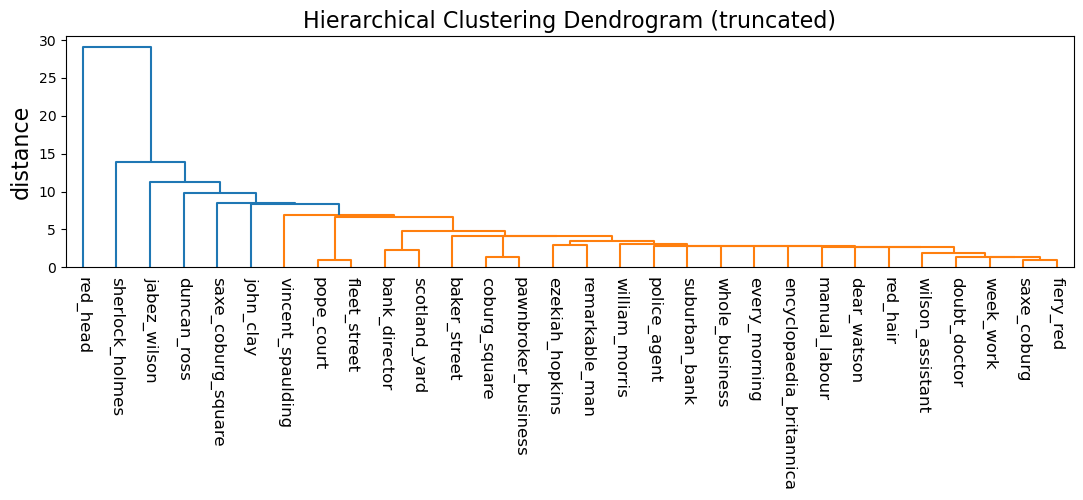

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage

labels = M.index.tolist()
p      = len(labels)
linkage_data = linkage( M, method='ward', metric='euclidean' )

plt.figure(figsize=(13,3))
plt.title('Hierarchical Clustering Dendrogram (truncated)', fontsize=16)
plt.ylabel('distance', fontsize=16, rotation=90 )

R = dendrogram(
      linkage_data
    , truncate_mode   = 'lastp'   # show only the last p merged clusters   # None  'lastp'  'level'
    , p               =  p        # show only the last p merged clusters
    , no_plot         =  True
    )

#print("values passed to leaf_label_func\nleaves : ", R["leaves"])
temp = {}
for i in R["leaves"]: temp[i] = labels[i]
def llf(k): return temp[k]

dendrogram(
    
      linkage_data
    
    , truncate_mode   = 'lastp'   # show only the last p merged clusters   # None  'lastp'  'level'
    , p               =  p        # show only the last p merged clusters
    , leaf_label_func = llf
    , leaf_rotation   = -90
    , leaf_font_size  =  12
    , show_contracted = True      # to get a distribution impression in truncated branches 

    , orientation     = 'top'     # 'top'  'bottom'  'left'  'right'
    , color_threshold =   7       # Double
    , get_leaves      = True 
    
    
    # either count_sort=False  or  distance_sort=False
    , count_sort            = False     # False  'ascending'  'descending'
    , distance_sort         = True      # False  'ascending'  'descending'
    
    , show_leaf_counts      = True      
    , no_plot               = False
    , no_labels             = False
    
    , link_color_func       = None      # lambda k: colors[k]
    , ax                    = None
    , above_threshold_color = 'C0'
    )

plt.show()

#####   

#####   

#####   

#####   

#####   